**Introduction & Question**

The iris flower dataset or Fisher's iris dataset constains 50 samples from each of three closly related species of iris (iris setosa, iris virginica and iris versicolor).It is best known database to be found in the pattern recognition literature. Samples were collected in the Gaspé Peninsula from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus. In the dataset, four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Given the iris flower dataset, I am interested in iris setosa's response to sunlight with respect to its growth (the length and width of petal). Therefore, my research question is whether the sunlight has a prominent effect on the growth of iris setosa. The length and width of sepals can be our secondary outcome of interest 

**Hypothesis**

With the assumption that changes in the natural environmet of plants affect their functioning, my hypothesisis is that iris setosa will decrease its petal length and width given the low availability of sunlight.  

**The Method of Testing**

We will have Fisher's iris setosa dataset as the control group and create one testing group. For the testing group, plant 50 setosa under constant shade and record the size of their petals. The variable of interest is the length and width of their petals in control and testing groups. Therefore, we should  minimize other factors (temperature, water availability, geographic locality, measurement time, etc.) that will contribute to the difference in returned petal size between the two groups. Those factors should be constant and the same with the control group. This is an A/B manipulation of sunlight. 

We will monitor the testing group over a lifecycle and record their petal length in the bloom season of their growth stage. 

The success metrics for the experiment is having one or more standard deviation of decline in petal length or width when there is no sunlight. If the average in  either petal length or petal width decreases in the testing group by one or more standard deviations (compared to the control group), conclude that low availabiliy of sun has a prominent effect on iris setosa's growth. If the averages in either petal length or width decreases in the testing group by less than one standard deviations (compared to the control group), conclude that low availabiliy of sun has little effect on iris setosa's growth. the research was not sucessful. If one of the averages in petal length and width increases but the other decreases (compared to the control group), then conclude that the research is inconclusive. 


In [12]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns

In [31]:
df = pd.read_csv("iris.csv")

#summary stats for 3 iris species presented in Fisher's Dataset 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


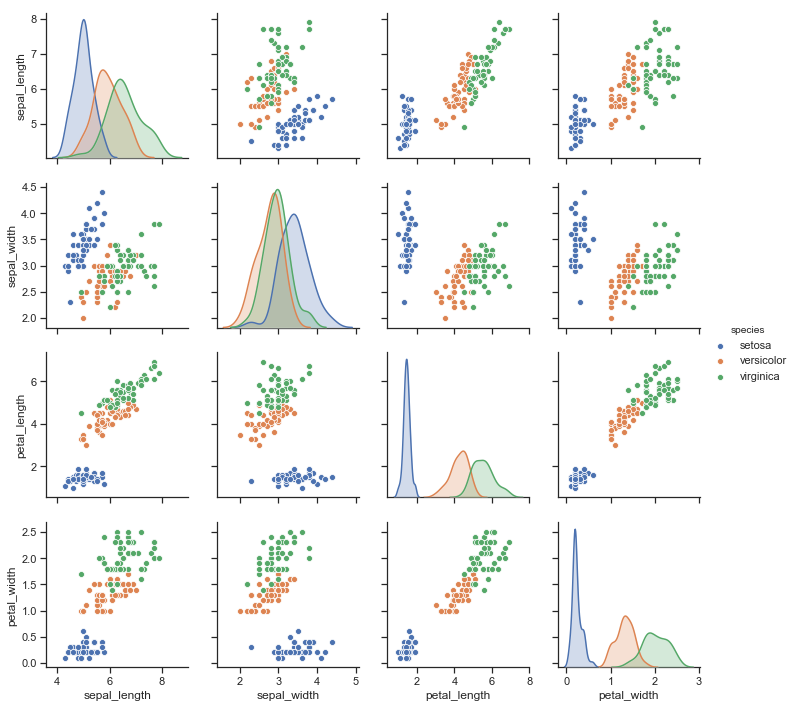

In [41]:
#see the relations between four features that were measured 
sns.set(style="ticks", color_codes=True)
d = sns.pairplot(df, hue = 'species')

In [37]:
#Since my experiment is interested in iris setosa, I'll display 50 iris setosa samples from Fisher's iris dataset
setosa = df[df["species"] == 'setosa']
print(setosa)

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

In [14]:
#Average sepel length, sepal width, petal length, petal width for iris setosa in Fisher's iris dataset
df[df["species"] == 'setosa'][['sepal_length','sepal_width','petal_length', 'petal_width']].mean()

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

In [15]:
# Calculate standard deviation for sepal length 
np.std(setosa.petal_length)

0.17191858538273283

In [16]:
# Calculate standard deviation for sepal width 
np.std(setosa.petal_width)

0.1043264108459598

In [35]:
# create a list of setosa length 1-3 SDs away from the mean
iris_setosa_length = [np.mean(setosa.petal_length) - np.std(setosa.petal_length)]

leng = []
for i in range (-3,4):
    iris_setasa_length = np.mean(setosa.petal_length) + i*np.std(setosa.petal_length)
    leng.append(iris_setasa_length)

print(leng)

# create a list of setosa width 1-3 SDs away from the mean
iris_setosa_width = [np.mean(setosa.petal_width) - np.std(setosa.petal_width)]

wid = []
for i in range (-3,4):
    iris_setasa_width = np.mean(setosa.petal_width) + i*np.std(setosa.petal_width)
    wid.append(iris_setasa_width)


print(wid)


[0.9462442438518017, 1.1181628292345345, 1.2900814146172674, 1.4620000000000002, 1.633918585382733, 1.805837170765466, 1.9777557561481987]
[-0.06697923253787944, 0.037347178308080375, 0.14167358915404016, 0.24599999999999997, 0.3503264108459598, 0.45465282169191956, 0.5589792325378794]


Per statistics above, 1.29 cm is the markdown for one standard deviation left of the mean of the petal length, which means if the petal length is less than 1.29cm in the testing group, then the experiment is sucessful. 0.14 cm is the markdown for one standard deviation left of the mean of the petal width, which also means that if the petal width in the testing group is less than 0.14cm, then experiment is sucessful. 